In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [78]:
files = ["time_asap.txt","time_SACLL.txt", "time_SACPF.txt", "time_nov2g.txt", "time_optim.txt"]
agents = ["No-Control", "Agg. SAC LL", "Agg. SAC PF", "No-V2G", "LP-V2G"]

In [79]:
i = 0
data = []

for i in range(len(files)):
    name = agents[i]
    with open(f"../time/{files[i]}", "r") as file:
        lines = file.readlines()
        for line in lines:
            if "real" in line:
                time_fmt = line.split("\t")[1].strip()
                minutes = float(time_fmt.split("m")[0])
                seconds = float(time_fmt.split("m")[1].split("s")[0])
                time = minutes + seconds / 60
                data.append([name, time])

df_time = pd.DataFrame(data, columns=["Agent", "Time"])


In [80]:
df_time.head(6)

,Agent,Time
0,No-Control,0.840800
1,No-Control,0.850767
2,No-Control,0.840233
3,No-Control,0.856550
4,No-Control,0.857733
5,Agg. SAC LL,2.300233


In [81]:
gdf_time = df_time.groupby("Agent").mean()
gdf_time.head()

,Time
Agent,
Agg. SAC LL,2.308163
Agg. SAC PF,2.907213
LP-V2G,22.779877
No-Control,0.849217
No-V2G,18.357873


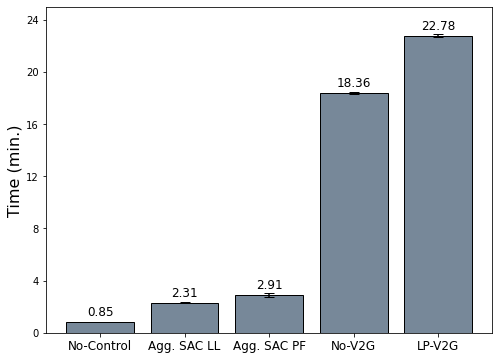

In [82]:
fig1 = plt.figure(figsize = (8,6))
ax1 = fig1.add_subplot(111)
fontsize = 12

for i, agent in enumerate(agents):
    times = df_time[df_time["Agent"] == agent]["Time"].values
    ax1.bar(i, times.mean(), yerr = (times.max()-times.min())/2, lw = 1, edgecolor = "black", capsize = 5, color = "lightslategray")
    ax1.text(i, times.mean() + 0.5, f"{times.mean():.2f}", ha = "center", fontsize = fontsize)

ax1.set_xticks(range(len(agents)))
ax1.set_xticklabels(agents, fontsize = fontsize, rotation = 0)
ax1.set_yticks(np.arange(0, 25, 4))
ax1.set_ylabel("Time (min.)", fontsize = fontsize + 4)
ax1.set_ylim([0, 25])

fig1.savefig("/home/javier/Documents/Escuela/SCRG/notes-scrg/writeups/Thesis-MsC/647584cd16a82b116e63ba95/img/agents_timetrial.pdf", dpi = 1200, bbox_inches='tight')